In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
Air=pd.read_excel("Airlines+Data.xlsx")
Air.head(10)

,Month,Passengers
0,1995-01-01,112
1,1995-02-01,118
2,1995-03-01,132
3,1995-04-01,129
4,1995-05-01,121
5,1995-06-01,135
6,1995-07-01,148
7,1995-08-01,148
8,1995-09-01,136
9,1995-10-01,119


In [3]:
Air.shape

(96, 2)

In [4]:
Air.dtypes

Month         datetime64[ns]
Passengers             int64
dtype: object

In [5]:
Air.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 96 entries, 0 to 95
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   Month       96 non-null     datetime64[ns]
 1   Passengers  96 non-null     int64         
dtypes: datetime64[ns](1), int64(1)
memory usage: 1.6 KB


In [7]:
Air.describe()

,Passengers
count,96.000000
mean,213.708333
std,71.918216
min,104.000000
25%,156.000000
50%,200.000000
75%,264.750000
max,413.000000


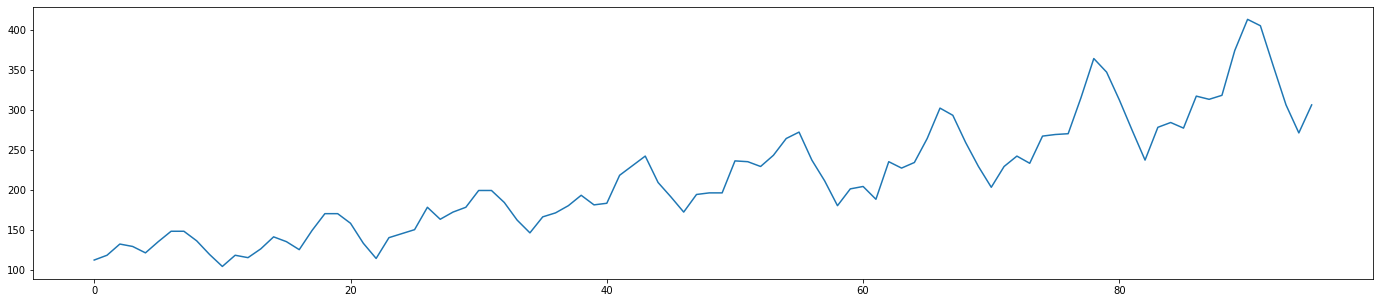

In [8]:
## visualization
plt.figure(figsize=(24,5))
Air.Passengers.plot()

In [9]:
Air["Date"] = pd.to_datetime(Air.Month,format="%b-%y")

In [12]:
# Extracting Day, weekday name, month name, year from the Date column using 
# Date functions from pandas 

In [13]:
Air["month"] = Air.Date.dt.strftime("%b")
Air["year"] = Air.Date.dt.strftime("%y")

In [14]:
Air["Day"] = Air.Date.dt.strftime("%d")
Air["wkday"] = Air.Date.dt.strftime("%A") 

In [15]:
Air

,Month,Passengers,Date,month,year,Day,wkday
0,1995-01-01,112,1995-01-01,Jan,95,01,Sunday
1,1995-02-01,118,1995-02-01,Feb,95,01,Wednesday
2,1995-03-01,132,1995-03-01,Mar,95,01,Wednesday
3,1995-04-01,129,1995-04-01,Apr,95,01,Saturday
4,1995-05-01,121,1995-05-01,May,95,01,Monday
...,...,...,...,...,...,...,...
91,2002-08-01,405,2002-08-01,Aug,02,01,Thursday
92,2002-09-01,355,2002-09-01,Sep,02,01,Sunday
93,2002-10-01,306,2002-10-01,Oct,02,01,Tuesday
94,2002-11-01,271,2002-11-01,Nov,02,01,Friday


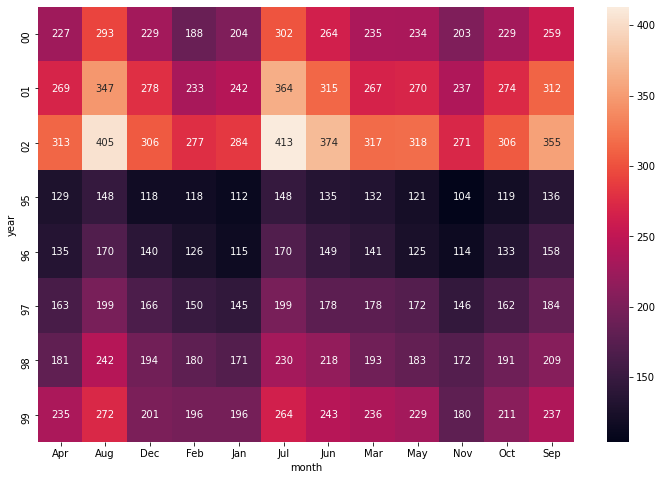

In [16]:
plt.figure(figsize=(12,8))
heatmap_y_month = pd.pivot_table(data=Air,values="Passengers",index="year",columns="month",aggfunc="mean",fill_value=0)
sns.heatmap(heatmap_y_month,annot=True,fmt="g") #fmt is format of the grid values

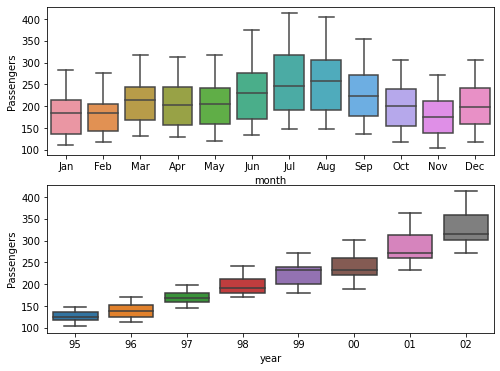

In [17]:
# Boxplot for ever
plt.figure(figsize=(8,6))
plt.subplot(211)
sns.boxplot(x="month",y="Passengers",data=Air)
plt.subplot(212)
sns.boxplot(x="year",y="Passengers",data=Air)

<ipython-input-19-ba5954dd7c1d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  Air['month'][i]= A[0:3]


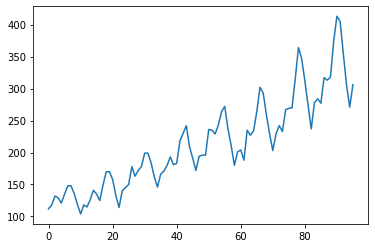

In [19]:
month =['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec'] 
A = Air["month"][0]
A[0:3]
Air['Month']= 0
for i in range(96):
    A = Air["month"][i]
    Air['month'][i]= A[0:3]
    
month_dummies = pd.DataFrame(pd.get_dummies(Air['month']))
Air1 = pd.concat([Air.Passengers,month_dummies],axis = 1)

Air1["t"] = np.arange(1,97)

Air1["t_square"] = Air1["t"]*Air1["t"]
Air1.columns
Air1["log_Passengers"] = np.log(Air1["Passengers"])
Air1.rename(columns={"Passengers ": 'Passengers'}, inplace=True)
Air1.Passengers.plot()

In [20]:
Air1

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585
94,271,0,0,0,0,0,0,0,0,0,1,0,0,95,9025,5.602119


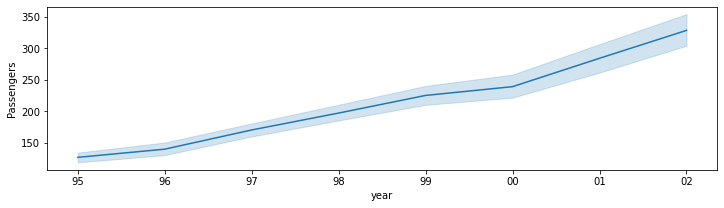

In [21]:
plt.figure(figsize=(12,3))
sns.lineplot(x="year",y="Passengers",data=Air)

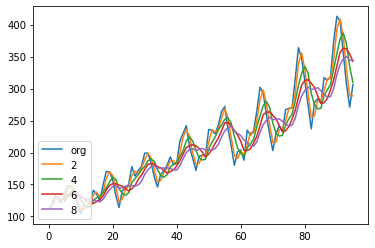

In [22]:
Air.Passengers.plot(label="org")
for i in range(2,10,2):
    Air["Passengers"].rolling(i).mean().plot(label=str(i))
plt.legend(loc=3)

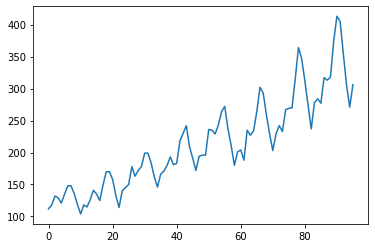

In [23]:
Air.Passengers.plot()

In [24]:
# # Splitting data
Train = Air1.head(72)

In [26]:
Test = Air1.iloc[72:84,:]

In [27]:
predict_data = Air1.tail(12)

In [28]:
Air2= Air1.iloc[0:84,:]

In [29]:
Train

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
0,112,0,0,0,0,1,0,0,0,0,0,0,0,1,1,4.718499
1,118,0,0,0,1,0,0,0,0,0,0,0,0,2,4,4.770685
2,132,0,0,0,0,0,0,0,1,0,0,0,0,3,9,4.882802
3,129,1,0,0,0,0,0,0,0,0,0,0,0,4,16,4.859812
4,121,0,0,0,0,0,0,0,0,1,0,0,0,5,25,4.795791
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,293,0,1,0,0,0,0,0,0,0,0,0,0,68,4624,5.680173
68,259,0,0,0,0,0,0,0,0,0,0,0,1,69,4761,5.556828
69,229,0,0,0,0,0,0,0,0,0,0,1,0,70,4900,5.433722
70,203,0,0,0,0,0,0,0,0,0,1,0,0,71,5041,5.313206


In [30]:
Test

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
72,242,0,0,0,0,1,0,0,0,0,0,0,0,73,5329,5.488938
73,233,0,0,0,1,0,0,0,0,0,0,0,0,74,5476,5.451038
74,267,0,0,0,0,0,0,0,1,0,0,0,0,75,5625,5.587249
75,269,1,0,0,0,0,0,0,0,0,0,0,0,76,5776,5.594711
76,270,0,0,0,0,0,0,0,0,1,0,0,0,77,5929,5.598422
77,315,0,0,0,0,0,0,1,0,0,0,0,0,78,6084,5.752573
78,364,0,0,0,0,0,1,0,0,0,0,0,0,79,6241,5.897154
79,347,0,1,0,0,0,0,0,0,0,0,0,0,80,6400,5.849325
80,312,0,0,0,0,0,0,0,0,0,0,0,1,81,6561,5.743003
81,274,0,0,0,0,0,0,0,0,0,0,1,0,82,6724,5.613128


In [31]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [32]:
# # Build Model & RMSE Value
#  Linear Model
import statsmodels.formula.api as smf 
linear_model = smf.ols('Passengers~t',data=Train).fit()
pred_linear =  pd.Series(linear_model.predict(pd.DataFrame(Test['t'])))
rmse_linear = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_linear))**2))
rmse_linear

42.786560820931676

In [35]:
# Exponential
Exp = smf.ols('log_Passengers~t',data=Train).fit()
pred_Exp = pd.Series(Exp.predict(pd.DataFrame(Test['t'])))
rmse_Exp = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Exp)))**2))
rmse_Exp

38.781761813929904

In [36]:
# Quadratic 
Quad = smf.ols('Passengers~t+t_square',data=Train).fit()
pred_Quad = pd.Series(Quad.predict(Test[["t","t_square"]]))
rmse_Quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_Quad))**2))
rmse_Quad

42.949257149488886

In [37]:
# Additive seasonality 
add_sea = smf.ols('Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea = pd.Series(add_sea.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov']]))
rmse_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea))**2))
rmse_add_sea

103.1143176285428

In [38]:
## Additive Seasonality Quadratic
add_sea_Quad = smf.ols('Passengers~t+t_square+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Train).fit()
pred_add_sea_quad = pd.Series(add_sea_Quad.predict(Test[['Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','t','t_square']]))
rmse_add_sea_quad = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(pred_add_sea_quad))**2))
rmse_add_sea_quad

25.481375031754688

In [39]:
# Multiplicative Seasonality
Mul_sea = smf.ols('log_Passengers~Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_sea = pd.Series(Mul_sea.predict(Test))
rmse_Mult_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_sea)))**2))
rmse_Mult_sea

108.10379108134971

In [40]:
## Multiplicative Additive Seasonality 
Mul_Add_sea = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data = Train).fit()
pred_Mult_add_sea = pd.Series(Mul_Add_sea.predict(Test))
rmse_Mult_add_sea = np.sqrt(np.mean((np.array(Test['Passengers'])-np.array(np.exp(pred_Mult_add_sea)))**2))
rmse_Mult_add_sea

11.8204209501224

In [41]:
## Compare the results 
data = {"MODEL":pd.Series(["rmse_linear","rmse_Exp","rmse_Quad","rmse_add_sea","rmse_add_sea_quad","rmse_Mult_sea","rmse_Mult_add_sea"]),"RMSE_Values":pd.Series([rmse_linear,rmse_Exp,rmse_Quad,rmse_add_sea,rmse_add_sea_quad,rmse_Mult_sea,rmse_Mult_add_sea])}
table_rmse=pd.DataFrame(data)
table_rmse.sort_values(['RMSE_Values'])

,MODEL,RMSE_Values
6,rmse_Mult_add_sea,11.820421
4,rmse_add_sea_quad,25.481375
1,rmse_Exp,38.781762
0,rmse_linear,42.786561
2,rmse_Quad,42.949257
3,rmse_add_sea,103.114318
5,rmse_Mult_sea,108.103791


In [42]:
# # Predict for new time model
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585


In [43]:
## Build the model on entire data set
model_full = smf.ols('log_Passengers~t+Jan+Feb+Mar+Apr+May+Jun+Jul+Aug+Sep+Oct+Nov',data=Air2).fit()

In [44]:
pred_new  = pd.Series(Mul_Add_sea.predict(predict_data))
pred_new

84    5.637978
85    5.662487
86    5.808210
87    5.765280
88    5.753323
89    5.865720
90    5.966763
91    5.975173
92    5.867869
93    5.740788
94    5.611277
95    5.746501
dtype: float64

In [45]:
predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)

<ipython-input-45-43dd3da0300d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  predict_data["forecasted_Passengers"] = pd.DataFrame(pred_new)


In [46]:
predict_data

,Passengers,Apr,Aug,Dec,Feb,Jan,Jul,Jun,Mar,May,Nov,Oct,Sep,t,t_square,log_Passengers,forecasted_Passengers
84,284,0,0,0,0,1,0,0,0,0,0,0,0,85,7225,5.648974,5.637978
85,277,0,0,0,1,0,0,0,0,0,0,0,0,86,7396,5.624018,5.662487
86,317,0,0,0,0,0,0,0,1,0,0,0,0,87,7569,5.758902,5.808210
87,313,1,0,0,0,0,0,0,0,0,0,0,0,88,7744,5.746203,5.765280
88,318,0,0,0,0,0,0,0,0,1,0,0,0,89,7921,5.762051,5.753323
89,374,0,0,0,0,0,0,1,0,0,0,0,0,90,8100,5.924256,5.865720
90,413,0,0,0,0,0,1,0,0,0,0,0,0,91,8281,6.023448,5.966763
91,405,0,1,0,0,0,0,0,0,0,0,0,0,92,8464,6.003887,5.975173
92,355,0,0,0,0,0,0,0,0,0,0,0,1,93,8649,5.872118,5.867869
93,306,0,0,0,0,0,0,0,0,0,0,1,0,94,8836,5.723585,5.740788
